### Nama: Jonathan Calvin Limawal
### Kode Peserta: PYTN-KS16-019
### Track: Data Science

## Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline

## Dataset

In [2]:
data = pd.read_csv("nyc-rolling-sales.csv")
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

## Data Preprocessing

### Dropping Unrelated/Unused Columns

In [4]:
cleaned_data = data.drop(['Unnamed: 0', 'ZIP CODE', 'EASE-MENT', 
                         'APARTMENT NUMBER', 'ADDRESS', 'LOT'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   BUILDING CLASS AT PRESENT       84548 non-null  object
 6   RESIDENTIAL UNITS               84548 non-null  int64 
 7   COMMERCIAL UNITS                84548 non-null  int64 
 8   TOTAL UNITS                     84548 non-null  int64 
 9   LAND SQUARE FEET                84548 non-null  object
 10  GROSS SQUARE FEET               84548 non-null  object
 11  YEAR BUILT                      84548 non-null  int64 
 12  TAX CLASS AT TIME OF SALE       84548 non-null

### Removing Duplicate Data

In [5]:
total_of_duplicate_data = sum(cleaned_data.duplicated())
total_of_duplicate_data

2751

In [6]:
cleaned_data = cleaned_data.drop_duplicates()
sum(cleaned_data.duplicated())

0

### Checking and Imputing Missing Values

In [7]:
cleaned_data.replace(' -  ', 0,  inplace=True)
cleaned_data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [8]:
cleaned_data.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

### Formatting Data

In [9]:
cleaned_data['BOROUGH NAME'] = cleaned_data['BOROUGH'].replace({1: 'Manhattan',
                                                                2: 'Bronx',
                                                                3: 'Brooklyn',
                                                                4: 'Queens',
                                                                5: 'Staten Island'})
cleaned_data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH NAME
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan


In [10]:
cleaned_data['SALE PRICE'] = cleaned_data['SALE PRICE'].astype('int64')
cleaned_data['LAND SQUARE FEET'] = cleaned_data['LAND SQUARE FEET'].astype('int64')
cleaned_data['GROSS SQUARE FEET'] = cleaned_data['GROSS SQUARE FEET'].astype('int64')

In [11]:
cleaned_data['BOROUGH NAME'].unique()

array(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [12]:
cleaned_data['SALE DATE'] = pd.to_datetime(cleaned_data['SALE DATE'])

cleaned_data['SALE YEAR'] = cleaned_data['SALE DATE'].dt.year
cleaned_data['SALE MONTH'] = cleaned_data['SALE DATE'].dt.month
cleaned_data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH NAME,SALE YEAR,SALE MONTH
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19,Manhattan,2017,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14,Manhattan,2016,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09,Manhattan,2016,12
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23,Manhattan,2016,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17,Manhattan,2016,11


In [13]:
cleaned_data['YEAR BUILT'].unique()

array([1900, 1913, 1920, 1910, 2009, 1925, 1902, 1928, 1930, 1935, 1937,
       1915, 1950, 1929, 1901, 1940, 2005,    0, 1989, 2014, 2008, 1965,
       2013, 2003, 2006, 2007, 1951, 1899, 1850, 1905, 1864, 1917, 1911,
       1983, 1926, 1963, 1960, 1889, 1898, 1939, 1938, 1927, 1909, 1958,
       1904, 1907, 1987, 1931, 1984, 1948, 2004, 1918, 1875, 2012, 1973,
       2011, 1922, 2001, 1932, 1980, 1908, 1953, 1906, 2015, 1946, 1921,
       2010, 1954, 1111, 1924, 1990, 1890, 1991, 1988, 1895, 2016, 1957,
       1986, 1966, 1998, 1870, 1923, 1969, 2017, 1968, 1934, 1956, 1982,
       1914, 1903, 1967, 1840, 1912, 1964, 1955, 1961, 1851, 2000, 1959,
       1962, 1945, 1972, 1976, 1916, 1880, 1970, 1846, 1941, 1952, 1896,
       1985, 1981, 1888, 1947, 1975, 1974, 2002, 1994, 1892, 1894, 1891,
       1996, 1997, 1949, 1999, 1800, 1979, 1971, 1977, 1942, 1978, 1826,
       1881, 1919, 1883, 1936, 1993, 1995, 1933, 1992, 1943, 1944, 1847,
       1829, 1844, 1835, 1852, 1856, 1854, 1832, 18

In [14]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81797 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         81797 non-null  int64         
 1   NEIGHBORHOOD                    81797 non-null  object        
 2   BUILDING CLASS CATEGORY         81797 non-null  object        
 3   TAX CLASS AT PRESENT            81797 non-null  object        
 4   BLOCK                           81797 non-null  int64         
 5   BUILDING CLASS AT PRESENT       81797 non-null  object        
 6   RESIDENTIAL UNITS               81797 non-null  int64         
 7   COMMERCIAL UNITS                81797 non-null  int64         
 8   TOTAL UNITS                     81797 non-null  int64         
 9   LAND SQUARE FEET                81797 non-null  int64         
 10  GROSS SQUARE FEET               81797 non-null  int64         
 11  YE

### 1. Mean

**Pertanyaan:**
Berapa rata-rata harga properti di daerah Manhattan pada tahun 2017?

**Hipotesis:**
Rata-rata harga properti di daerah Manhattan pada tahun 2017 sekitar $2,000,000.00.

In [15]:
condition = (cleaned_data['BOROUGH NAME'] == 'Manhattan') & (cleaned_data['SALE YEAR'] == 2017)

manhattan_2017_data = cleaned_data[condition]

average_property_price = manhattan_2017_data['SALE PRICE'].mean()
print("Rata-rata harga properti di NYC dari tahun ke tahun = ${:.2f}".format(average_property_price))

Rata-rata harga properti di NYC dari tahun ke tahun = $2694135.70


**Kesimpulan:**

Rata-rata harga properti di daerah Manhtaan pada tahun 2017 sekitar $2,694,135.70


### 2. Median

**Pertanyaan:**
Berapa median dari harga properti di New York City, dan bagaimana perbedaannya di berbagai wilayah?

**Hipotesis:**
Median dari harga properti di Manhattan lebih tinggi daripada di wilayah lain.

In [17]:
overall_median_sale_price = cleaned_data['SALE PRICE'].median()
print("Median harga properti secara keseluruhan = ${:.1f}".format(overall_median_sale_price))

Median harga properti secara keseluruhan = $432000.0


In [18]:
median_sale_price_borough = cleaned_data.groupby('BOROUGH NAME')['SALE PRICE'].median().reset_index()
print("Median harga properti berdasarkan Wilayah (Borough):")
print(median_sale_price_borough)

Median harga properti berdasarkan Wilayah (Borough):
    BOROUGH NAME  SALE PRICE
0          Bronx    280000.0
1       Brooklyn    445000.0
2      Manhattan    890000.0
3         Queens    320000.0
4  Staten Island    366000.0


**Kesimpulan:**

* Median dari harga properti di New York City sekitar $432,000.0.
* Median dari harga properti di wilayah Manhattan adalah yang paling besar dan perbedaannya cukup signifikan dibandingkan dengan daerah lain.


### 3. Modus

**Pertanyaan:**
Wilayah mana yang paling banyak menjadi asal/tempat properti di New York City?

**Hipotesis:**
Bronx merupakan wilayah yang paling banyak menjadi asal/tempat properti di New York City.

In [19]:
mode_borough = cleaned_data['BOROUGH'].mode().iloc[0] 

if mode_borough == 1:
    mode_borough = 'Manhattan'
elif mode_borough == 2:
    mode_borough = 'Bronx'
elif mode_borough == 3:
    mode_borough = 'Brooklyn'
elif mode_borough == 4:
    mode_borough = 'Queens'
elif mode_borough == 5:
    mode_borough = 'Staten Island'
else:
    mode_borough = None

print("Modus dari Wilayah:", mode_borough)

Modus dari Wilayah: Queens


In [20]:
borough_counts = cleaned_data['BOROUGH'].value_counts()
borough_counts

4    26036
3    23399
1    17329
5     8161
2     6872
Name: BOROUGH, dtype: int64

**Kesimpulan:**

* Queens merupakan wilayah yang paling banyak menjadi asal/tempat properti di New York City.
* Dengan persentase, 26036 dari 81797 atau sekitar 25% dari total wilayah yang ada


### 4. Range

**Pertanyaan:**
Berapa range (jangkauan) harga properti di daerah Queens pada tahun 2016?

**Hipotesis:**
Range (jangkuan) harga properti di daerah Queens pada tahun 2016 sekitar $150,000,000.00.

In [21]:
condition = (cleaned_data['BOROUGH NAME'] == 'Queens') & (cleaned_data['SALE YEAR'] == 2016)

queen_2016_data = cleaned_data[condition]

sale_price_range = queen_2016_data['SALE PRICE'].max() - queen_2016_data['SALE PRICE'].min()
print("Range (jangkauan) harga properti di daerah Queens (2016) = ${:.0f}".format(sale_price_range))

Range (jangkauan) harga properti di daerah Queens (2016) = $257500000


**Kesimpulan:**

Range (jangkauan) harga properti di daerah Queens pada tahun 2016 sekitar $257,500,000


### 5. Variance

**Pertanyaan:**
Berapa varians dari ukuran properti (diukur dalam *gross square footage*) di New York City?

**Hipotesis:**
Varians dari ukuran properti (diukur dalam *gross square footage*) di New York City sekitar 750,000,000.00.

In [28]:
variance_gross_square_feet = cleaned_data['GROSS SQUARE FEET'].var()
print("Varians dari ukuran properti: {:.2f}".format(variance_gross_square_feet), "(dalam square feet)")

Varians dari ukuran properti: 831282874.24 (dalam square feet)


**Kesimpulan**:

* Varians dari ukuran properti (diukur dalam *gross square footage*) di New York City sekitar 831,282,874.24 (dalam square feet)
* Nilai varians yang vesar menandakan bahwa luas (kasar/kotor) dari properti-properti yang ada/dijual di NYC sangat beragam.

### 6. Standar Deviation

**Pertanyaan:**
Berapa standar deviasi dari umur properti (diukur dalam tahun sejak konstruksi) di New York City?

**Hipotesis:**
Standar deviasi dari umur properti (diukur dalam tahun sejak konstruksi) di New York City sekitar 500.

In [31]:
std_dev_year_built = cleaned_data['YEAR BUILT'].std()
print("Standar Deviasi dari umur properti: {:.2f}".format(std_dev_year_built))
print(cleaned_data['YEAR BUILT'].mean())

Standar Deviasi dari umur properti: 525.70
1796.291599936428


**Kesimpulan**:

 * Standar deviasi dari umur properti (diukur dalam tahun sejak konstruksi) di New York City adalah 525.70.
 * Nilai standar deviasi  yang cukup besar menandakan bahwa umur properti (diukur dalam tahun sejak konstruksi) di New York City cukup beragam.

### 7. Probability Distribution

**Pertanyaan:**
Bagaimana distribusi probabilitas harga jual properti di Bronx?

**Hipotesis:**
Distribusi probabilitas harga jual di Bronx berdistribusi normal.

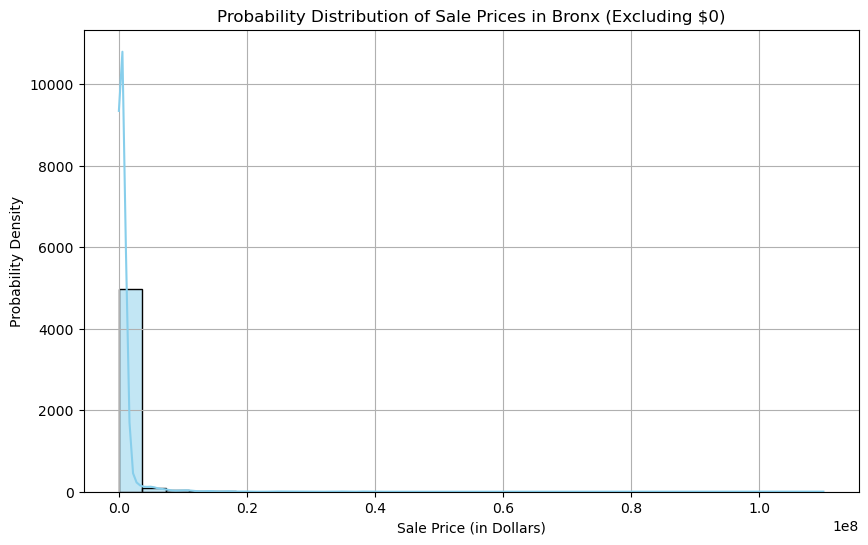

In [24]:
condition = (cleaned_data['BOROUGH NAME'] == 'Bronx') & (cleaned_data['SALE PRICE'] > 0)
bronx_data = cleaned_data[condition]

sale_prices = bronx_data['SALE PRICE']

plt.figure(figsize=(10, 6))
sns.histplot(sale_prices, bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Probability Distribution of Sale Prices in Bronx (Excluding $0)')
plt.xlabel('Sale Price (in Dollars)')
plt.ylabel('Probability Density')
plt.grid(True)

plt.show()

**Kesimpulan**:

* Distribusi probabilitas harga properti di wilayah Bronx sangat miring ke kiri (*left-skewed*).
* Hal ini dapat menandakan bahwa mayoritas harga  properti di Bronx terpusat di kategori bawah, yang berarti ada banyak properti dengan harga yang murah.


### 8. Hypothesis Testing + Confidence Intervals

**Pertanyaan:**
Apakah harga properti di wilayah Queens dan wilayah Brooklyn berbeda (secara signifikan) dan apakah kita dapat menyimpulkan bahwa properti di satu wilayah cenderung lebih mahal daripada yang lain?

**Hipotesis Null (H0):**
Tidak ada perbedaan yang signifikan dari rata-rata harga properti di wilayah Queens dan wilayah Brooklyn.

(μ_Queens - μ_Brooklyn = 0).

**Hipotesis Alternatif (H1):**
Ada perbedaan yang signifikan dari rata-rata harga properti di wilayah Queens dan wilayah Brooklyn.

(μ_Queens - μ_Brooklyn ≠ 0).

In [48]:
queens_sale_prices = cleaned_data[cleaned_data['BOROUGH NAME'] == 'Queens']['SALE PRICE']
brooklyn_sale_prices = cleaned_data[cleaned_data['BOROUGH NAME'] == 'Brooklyn']['SALE PRICE']

In [49]:
# Uji t (karena tidak diketahui nilai STD dari populasi data)
t_stat, p_value = stats.ttest_ind(queens_sale_prices, brooklyn_sale_prices, equal_var=False)

# Mendefinisikan nilai alfa 
alpha = 0.01

print("T-statistic:", t_stat)
print("P-value:", p_value)
print("\nKesimpulan:")


if p_value < alpha:
    print("Hipotesis Null ditolak (Hipotesis Alternatif (H1) diterima).")
else:
    print("Gagal menolak Hipotesis Null (Hipotesis Null (H0) diterima).")

T-statistic: -10.720575338743409
P-value: 8.847495808784857e-27

Kesimpulan:
Hipotesis Null ditolak (Hipotesis Alternatif (H1) diterima).


**Kesimpulan**:

* Ada perbedaan yang signifikan dari rata-rata harga properti di wilayah Queens dan wilayah Brooklyn.
* Confidence Intervals dari Hyphotesis Testing ini adalah 95% (100-alfa).
* Hal ini berarti, saya 99% yakin bahwa hasil uji hipotesis ini dan ada kemungkinan 1% bahwa hasilnya tidak akurat (salah).


### Overall Analysis

Pertama, rata-rata harga properti di Manhattan adalah yang tertinggi, sekitar 2,694,135.70 (US dollar). 
Akan tetapi, median harga properti di seluruh kota sekitar 432,000.0 (US dollar), hal ini menunjukkan adanya keragaman harga yang signifikan. 

Selain itu, properti di wilayah Manhattan memiliki median harga tertinggi, sementara Queens adalah wilayah dengan jumlah properti terbanyak. Selain itu, luas properti dan umur properti di kota NYC sangat bervariasi.

Kemudian, distribusi harga properti di wilayah Bronx sangat miring ke kiri (*left-skewed*), menunjukkan mayoritas harga properti di Bronx terpusat di kategori bawah, yang berarti ada banyak properti dengan harga yang murah.

Terakhir, perbedaan signifikan dalam rata-rata harga properti antara Queens dan Brooklyn mengindikasikan kemungkinan adanya perbedaan karakteristik dan permintaan properti di kedua wilayah ini.